# A1
If your project deals with a regression problem, please use one attribute of your dataset 
(X_train) along with the target values (y_train) for training a linear regression model. Sample code 
suggested below. 

In [3]:
import pandas as pd
import numpy as np 
df = pd.read_csv("HousingData.csv")
# import dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(df, feature_col, target_col, test_size=0.2, random_state=0):
    X = df[[feature_col]].copy()
    y = df[[target_col]].copy()

    # Fill missing values with mean
    X[feature_col] = X[feature_col].fillna(X[feature_col].mean())
    y[target_col] = y[target_col].fillna(y[target_col].mean())


    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_and_predict(X_train, Y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # create the model class then return the required values
    return model, y_pred_train, y_pred_test



def plot_results(X_test, Y_test, y_pred_test):
    plt.scatter(X_test, Y_test, label='Actual', color='blue')
    plt.plot(X_test, y_pred_test, color='black', label='Predicted')
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    plt.legend()
    plt.show()
    # simple scatter plot code with the required metrics as input 


# A2
Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set.

In [ ]:

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}
    # the testing of model metrics 


A1

Training Set Metrics: {'MSE': 38.91346592293865, 'RMSE': np.float64(6.238065879977435), 'MAPE': 0.21731266370857052, 'R2': 0.5429672814297002}


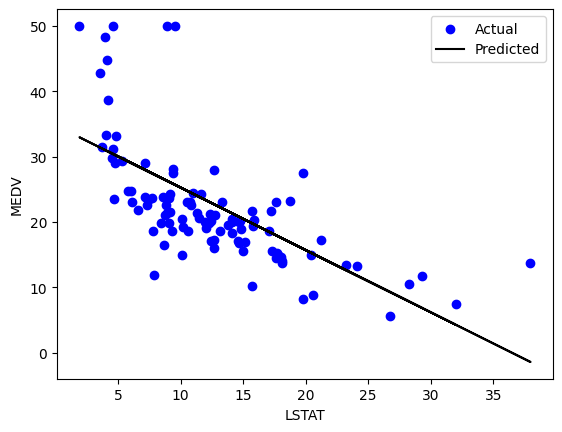

A2
Test Set Metrics: {'MSE': 46.47983238685987, 'RMSE': np.float64(6.817611926977061), 'MAPE': 0.239785719646659, 'R2': 0.4291941129864051}


In [ ]:

def main(df):

    X_train, X_test, Y_train, Y_test = prepare_data(df, "LSTAT", "MEDV")

    model, y_pred_train, y_pred_test = train_and_predict(X_train, Y_train, X_test) 
    # aboce will both train and predict the test the data directly

    train_metrics = calculate_metrics(Y_train, y_pred_train)
    test_metrics = calculate_metrics(Y_test, y_pred_test)
    print("A1")
    print("\nTraining Set Metrics:", train_metrics)
    
    
    plot_results(X_test, Y_test, y_pred_test)
    print("A2")
    print("Test Set Metrics:", test_metrics)

main(df)


# A3
 Repeat the exercises A1 and A2 with more than one attribute or all attributes.


In [ ]:
def train_predict_a3():
    #main section of the ML code for A3
    X = df.drop(columns=["MEDV"]).copy()
    y = df[["MEDV"]].copy()
    X = X.fillna(X.mean())
    y = y.fillna((y.mean()))
    x_train,x_test,y_train,y_test = train_test_split(X,y)
    model2 = LinearRegression()
    model2.fit(x_train,y_train)
    y_pred = model2.predict(x_test)
    
    return x_test,y_test,y_pred

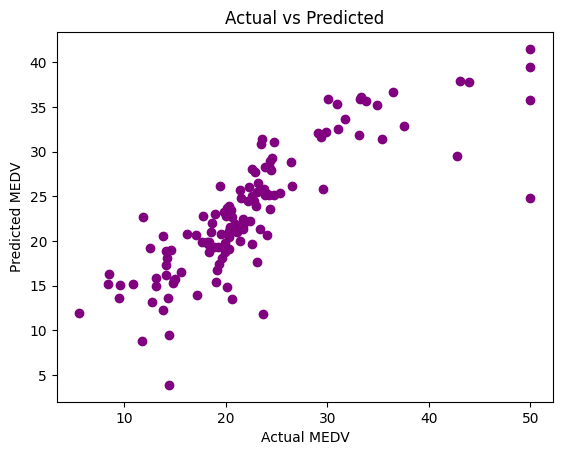

Test Set Metrics: {'MSE': 23.446132947558706, 'RMSE': np.float64(4.842120707660921), 'MAPE': 0.17517130746708232, 'R2': 0.6765852488929185}


In [23]:
def main():
    x_test, y_test, y_pred = train_predict_a3()
    plt.scatter(y_test, y_pred, color='purple')
    plt.xlabel("Actual MEDV")
    plt.ylabel("Predicted MEDV")
    plt.title("Actual vs Predicted")
    plt.show()
    test_metric = calculate_metrics(y_test,y_pred)
    print("Test Set Metrics:", test_metric)



main()


# A4 
Perform k-means clustering on your data

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def run_kmeans_clustering(dataframe, num_clusters, random_seed=0, n_init_value=10):
    """
    Perform KMeans clustering on the given dataframe.
    """
    filled_data = dataframe.fillna(0)
    kmeans_model = KMeans(
        n_clusters=num_clusters,
        random_state=random_seed,
        n_init=n_init_value
    ).fit(filled_data)

    return kmeans_model.labels_, kmeans_model.cluster_centers_


num_clusters = 3
labels, centroids = run_kmeans_clustering(df, num_clusters)

print(f"Cluster Labels:\n{labels}")
print(f"\nCluster Centroids:\n{centroids}")


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

# A5

For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def get_scores(df, k):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df)
    
    # calculate scores
    sil = silhouette_score(df, km.labels_)
    ch = calinski_harabasz_score(df, km.labels_)
    db = davies_bouldin_score(df, km.labels_)
    
    return sil, ch, db


k = 2
sil, ch, db = get_scores(filled_df, k)

print(f"Silhouette Score: {sil}")
print(f"Calinski-Harabasz Score: {ch}")
print(f"Davies-Bouldin Score: {db}")



c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.6860889770804488
Calinski-Harabasz Score: 1177.088193260924
Davies-Bouldin Score: 0.5505348682562442


# A6
Perform k-means clustering for different values of k. Evaluate the above scores for each k value. 
Make a plot of the values against the k value to determine the optimal cluster count. 

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

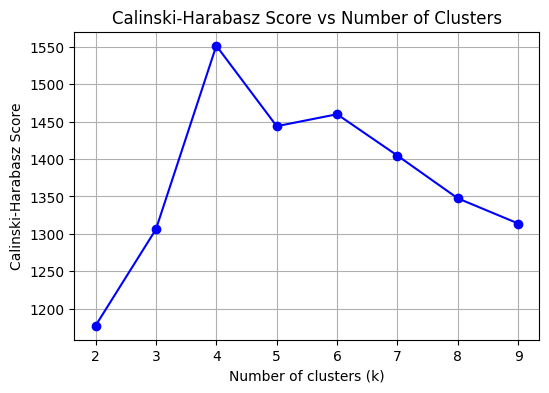

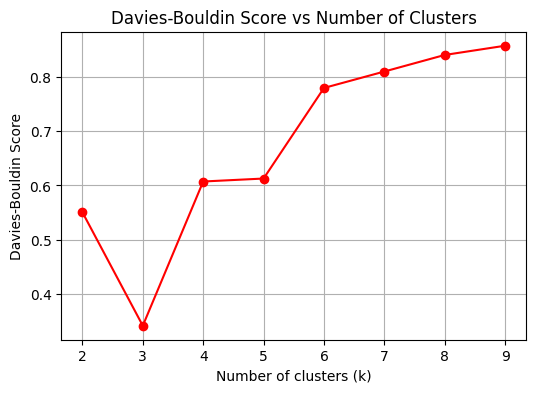

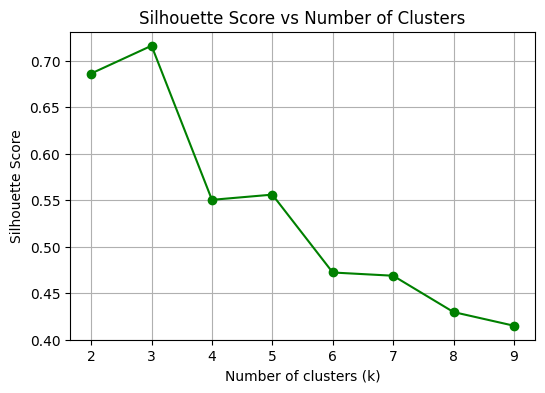

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def get_cluster_scores(df, k_range):
    sil_scores = []
    ch_scores = []
    db_scores = []

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=0, n_init=10)
        labels = km.fit_predict(df)

        ch_scores.append(calinski_harabasz_score(df, km.labels_))
        db_scores.append(davies_bouldin_score(df, km.labels_))
        sil_scores.append(silhouette_score(df, labels))

    return sil_scores, ch_scores, db_scores

def plot_score_vs_k(k_range, scores, title, ylabel, color):
    plt.figure(figsize=(6, 4))
    plt.plot(k_range, scores, marker='o', color=color)
    plt.title(title)
    plt.xlabel("Number of clusters (k)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()


K_range = range(2, min(10, len(df)))
sil, ch, db = get_cluster_scores(filled_df, K_range)

plot_score_vs_k(K_range, ch, "Calinski-Harabasz Score vs Number of Clusters", "Calinski-Harabasz Score", "blue")
plot_score_vs_k(K_range, db, "Davies-Bouldin Score vs Number of Clusters", "Davies-Bouldin Score", "red")
plot_score_vs_k(K_range, sil, "Silhouette Score vs Number of Clusters", "Silhouette Score", "green")


# A7


Using elbow plot, determine the optimal k value for k-means clustering. 

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

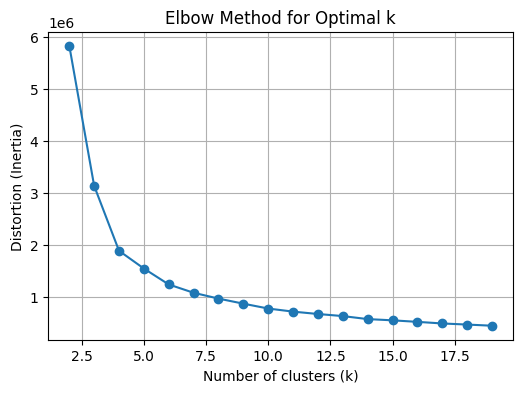

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def get_distortions(df, k_start=2, k_end=20):
    distortions = []
    for k in range(k_start, k_end):
        km = KMeans(n_clusters=k, random_state=0, n_init=10)
        km.fit(df)
        distortions.append(km.inertia_)
    return distortions

def plot_elbow(k_start, k_end, distortions):
    plt.figure(figsize=(6, 4))
    plt.plot(range(k_start, k_end), distortions, marker='o')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.grid(True)
    plt.show()


k_start = 2
k_end = 20
distortions = get_distortions(df, k_start, k_end)
plot_elbow(k_start, k_end, distortions)
